# P5 : Catégorisez automatiquement des questions - Nettoyage et exploration des données (EDA)

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup
from collections import Counter as count
import matplotlib.pylab as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
import gensim.corpora as corpora
from math import log

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Importation et format des données 

In [3]:
data = pd.read_csv('QueryResults.csv')

In [4]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,What is the Reason large sites don't use MySQL...,"<p>I have read <a href=""http://highscalability...",<asp.net><sql><mysql><sql-server><scalability>,2557405,24,8000,9,14
1,Using SVG in GWT,<p>I was wondering if it is possible to includ...,<javascript><html><gwt><svg>,691809,15,17380,5,8
2,StaleObjectstateException row was updated or d...,<p>I am getting this exception in a controller...,<java><hibernate><spring><exception><staleobje...,3158491,17,49068,5,4
3,What are the pros and cons of the assorted Jav...,<p>I am considering creating my own website us...,<java><web-frameworks><rich-internet-application>,24596,85,19249,70,24
4,Why should you prevent a class from being subc...,<p>What can be reasons to prevent a class from...,<oop>,24620,9,1764,1,14


In [5]:
data.tail()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
49995,How to do a LIKE query in Arel and Rails?,<p>I want to do something like:</p>\n\n<pre><c...,<ruby-on-rails><activerecord><arel>,4430578,123,95176,49,4
49996,how to get the opposite color of any backgroun...,<p>how to get the right color automatically th...,<delphi><image><color-picker>,4430598,15,8663,4,4
49997,private keyword vs no private keyword,<p>What is the use of the private keyword if e...,<c#><.net>,4430640,8,1186,1,4
49998,Powershell to replace text in multiple files s...,<p>I want to replace a text in multiple files ...,<file><powershell><replace><directory>,21558726,13,25551,2,4
49999,Secure Excel Workbook (with VBA) from reuse wi...,<p>I have created an Excel Workbook with a lot...,<vba><excel><security>,39878276,6,633,1,7


In [6]:
data.sample(20)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
26053,iOS7 TextKit: bullet point alignment,<p>I'm writing an app for iOS 7 only and I'm t...,<ios><cocoa-touch><ios7><uitextview><textkit>,19584908,20,12748,14,8
7178,OpenCV can't capture the frame from the webcam,<p>I am using OpenCV 2.4.6 with VS2010.</p>\n\...,<c++><opencv>,18386891,5,20186,1,6
11542,Android: Refreshing the Gallery after saving n...,<p>So in my application I at one point save a ...,<android><gallery><mediastore>,18624235,19,26211,11,8
20769,Efficient way to construct an XML document fro...,<p>I have a string that contains well formed x...,<c#><.net><xml>,1489422,6,9349,1,4
40661,How to set timeout for anonoymous block or que...,"<p>I know you can set user <a href=""https://st...",<sql><oracle><plsql><oracle11g>,20519192,7,8100,1,5
609,Determine the size of a pipe without calling r...,<p>I need a function called <code>SizeOfPipe()...,<c++><c><linux><unix>,71820,8,15139,1,13
48997,Mocking FacesContext,<p>I am trying to add some unit tests to a JSF...,<unit-testing><jsf><groovy><mocking><facescont...,4252353,20,26266,3,7
15280,Resource based authorization in .net,<p>Let's say that you have a .net web api with...,<.net><asp.net-mvc><asp.net-web-api><authoriza...,18854434,12,6340,6,5
4765,Javascript + IMG tags = memory leak. Is there ...,<p>I've got a web page that's using jquery to ...,<javascript><jquery><html><ajax><browser>,336348,8,3914,3,8
37666,Who defines regular expressions?,"<p>The W3C defines the HTML standard, CSS stan...",<regex><standards>,20257038,31,953,4,5


In [7]:
data.shape

(50000, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          50000 non-null  object
 1   Body           50000 non-null  object
 2   Tags           50000 non-null  object
 3   Id             50000 non-null  int64 
 4   Score          50000 non-null  int64 
 5   ViewCount      50000 non-null  int64 
 6   FavoriteCount  50000 non-null  int64 
 7   AnswerCount    50000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ MB


In [9]:
data.isna().mean()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [10]:
data['Title'] = data['Title'].astype(str)

In [11]:
data['Body'] = data['Body'].astype(str)

In [12]:
data['Tags'] = data['Tags'].astype(str)

In [16]:
data.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [17]:
data.nunique()

Title            49997
Body             50000
Tags             38327
Id               50000
Score             1048
ViewCount        35226
FavoriteCount      547
AnswerCount         81
dtype: int64

Il y a une répétition de 'Title' qui ne compte pas 50000 valeurs uniques. Par contre pas de duplicats pour 'Body'. Or 'Title' et 'Body' doivent être considérés ensemble dans le contexte de rédaction de posts. Par conséquent aucun post n'est dupliqué. 

In [18]:
data['Title'][:10]

0    What is the Reason large sites don't use MySQL...
1                                     Using SVG in GWT
2    StaleObjectstateException row was updated or d...
3    What are the pros and cons of the assorted Jav...
4    Why should you prevent a class from being subc...
5    Abstraction VS Information Hiding VS Encapsula...
6    What Are Some Examples of Design Pattern Imple...
7    What's the best way to get to know linux or BS...
8            Tactics for using PHP in a high-load site
9                     JavaScript editor within Eclipse
Name: Title, dtype: object

In [19]:
data['Body'][:10]

0    <p>I have read <a href="http://highscalability...
1    <p>I was wondering if it is possible to includ...
2    <p>I am getting this exception in a controller...
3    <p>I am considering creating my own website us...
4    <p>What can be reasons to prevent a class from...
5    <p>Can you tell me what is the difference betw...
6    <p>I'm a moderately skilled programmer using J...
7    <p>I'd like to gain better knowledge of operat...
8    <p>Before you answer this I have never develop...
9    <p>I'm looking for the best JavaScript editor ...
Name: Body, dtype: object

In [20]:
data['Tags'][:10]

0       <asp.net><sql><mysql><sql-server><scalability>
1                         <javascript><html><gwt><svg>
2    <java><hibernate><spring><exception><staleobje...
3    <java><web-frameworks><rich-internet-application>
4                                                <oop>
5    <encapsulation><abstraction><glossary><ooad><i...
6    <javascript><design-patterns><singleton><strat...
7        <linux><operating-system><kernel><bsd><osdev>
8                        <php><performance><high-load>
9               <javascript><eclipse><plugins><editor>
Name: Tags, dtype: object

## Première phase de nettoyage des données

### Suppression des balises html

In [26]:
def sup_balise(sentence) :
    return BeautifulSoup(sentence).get_text()

In [27]:
data["Title"] = data["Title"].apply(sup_balise)
data["Title"].head()

C:\Users\n_a_e\anaconda3\envs\IML-P5\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0    What is the Reason large sites don't use MySQL...
1                                     Using SVG in GWT
2    StaleObjectstateException row was updated or d...
3    What are the pros and cons of the assorted Jav...
4    Why should you prevent a class from being subc...
Name: Title, dtype: object

In [28]:
data["Body"] = data["Body"].apply(sup_balise)
data["Body"].head()

0    I have read this article from High Scalability...
1    I was wondering if it is possible to include S...
2    I am getting this exception in a controller of...
3    I am considering creating my own website using...
4    What can be reasons to prevent a class from be...
Name: Body, dtype: object

### Nettoyage des tags

In [29]:
data['Tags'] = data.apply(lambda r :r['Tags'].replace('<', ' ').replace('>', ' ') , axis=1)

In [30]:
data['Tags'].head()

0        asp.net  sql  mysql  sql-server  scalability 
1                          javascript  html  gwt  svg 
2     java  hibernate  spring  exception  staleobje...
3     java  web-frameworks  rich-internet-application 
4                                                 oop 
Name: Tags, dtype: object

### df_embedding

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          50000 non-null  object
 1   Body           50000 non-null  object
 2   Tags           50000 non-null  object
 3   Id             50000 non-null  int64 
 4   Score          50000 non-null  int64 
 5   ViewCount      50000 non-null  int64 
 6   FavoriteCount  50000 non-null  int64 
 7   AnswerCount    50000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.1+ MB


In [32]:
print(data.shape)
df_embedding = data.drop(['Id', 'Score', 'ViewCount', 'FavoriteCount', 'AnswerCount'], axis=1)
print(data_c.shape)

(50000, 8)
(50000, 3)


In [33]:
df_embedding.head()

,Title,Body,Tags
0,What is the Reason large sites don't use MySQL...,I have read this article from High Scalability...,asp.net sql mysql sql-server scalability
1,Using SVG in GWT,I was wondering if it is possible to include S...,javascript html gwt svg
2,StaleObjectstateException row was updated or d...,I am getting this exception in a controller of...,java hibernate spring exception staleobje...
3,What are the pros and cons of the assorted Jav...,I am considering creating my own website using...,java web-frameworks rich-internet-application
4,Why should you prevent a class from being subc...,What can be reasons to prevent a class from be...,oop


## Features engineering

In [35]:
def len_fct(sentence) :
    return len(sentence)

In [36]:
data["Title_len"] = data["Title"].apply(len_fct)
data["Title_len"].head()

0    60
1    16
2    55
3    63
4    53
Name: Title_len, dtype: int64

In [37]:
data["Body_len"] = data["Body"].apply(len_fct)
data["Body_len"].head()

0     585
1    2473
2    2419
3     902
4     127
Name: Body_len, dtype: int64

In [39]:
data["Tags_len"] = data["Tags"].apply(len_fct)
data["Tags_len"].head()

0    46
1    28
2    54
3    49
4     5
Name: Tags_len, dtype: int64

In [43]:
data["Tags_len_ratio"] = round(data.apply(
    lambda r: (r["Title_len"] + r["Body_len"]) / r["Tags_len"], axis=1
))
data["Tags_len_ratio"].head()

0    14.0
1    89.0
2    46.0
3    20.0
4    36.0
Name: Tags_len_ratio, dtype: float64

## Analyse exploratoire des données

In [44]:
data.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio
count,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,8.626758e+06,57.531500,6.242044e+04,18.979500,7.237800,50.552060,831.372700,29.458800,37.702420
std,1.383202e+07,225.094938,1.748175e+05,100.782543,6.099114,18.989728,1178.699537,14.661866,57.425712
min,4.000000e+00,4.000000,6.800000e+01,1.000000,4.000000,0.000000,16.000000,3.000000,1.000000
25%,9.087608e+05,8.000000,6.273750e+03,2.000000,4.000000,37.000000,295.000000,19.000000,13.000000
50%,2.290623e+06,16.000000,1.815300e+04,5.000000,6.000000,48.000000,531.000000,28.000000,23.000000
75%,4.267905e+06,41.000000,5.276225e+04,13.000000,8.000000,61.000000,955.000000,39.000000,42.000000
max,7.091913e+07,13315.000000,5.421690e+06,7520.000000,518.000000,150.000000,28702.000000,107.000000,2161.000000


In [45]:
data.describe(include = object)

,Title,Body,Tags
count,50000,50000,50000
unique,49997,49999,38327
top,How to get all privileges back to the root use...,"Has anyone used Mono, the open source .NET imp...",javascript
freq,2,2,268


### Analyse des filtres utilisés pour la requête

<AxesSubplot:>

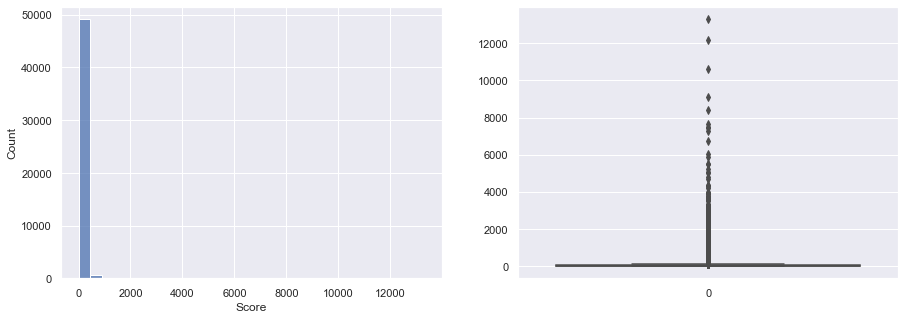

In [53]:
var = 'Score'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [58]:
#Transformation logarithmique
data['Score_log'] = [log(score+1) for score in data['Score']]

<AxesSubplot:>

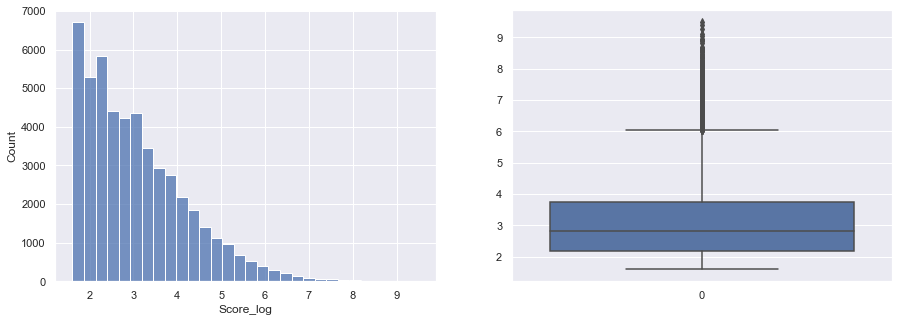

In [59]:
var = 'Score_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

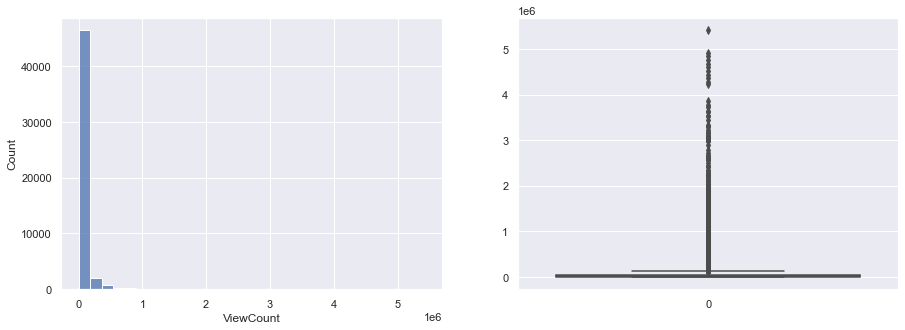

In [51]:
var = 'ViewCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [60]:
#Transformation logarithmique
data['ViewCount_log'] = [log(count+1) for count in data['ViewCount']]

<AxesSubplot:>

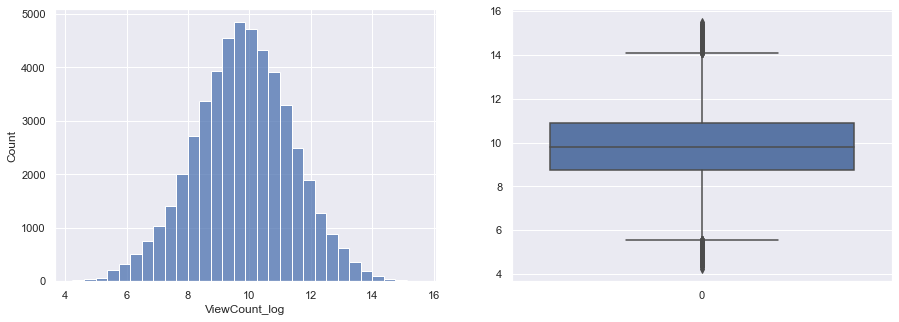

In [61]:
var = 'ViewCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

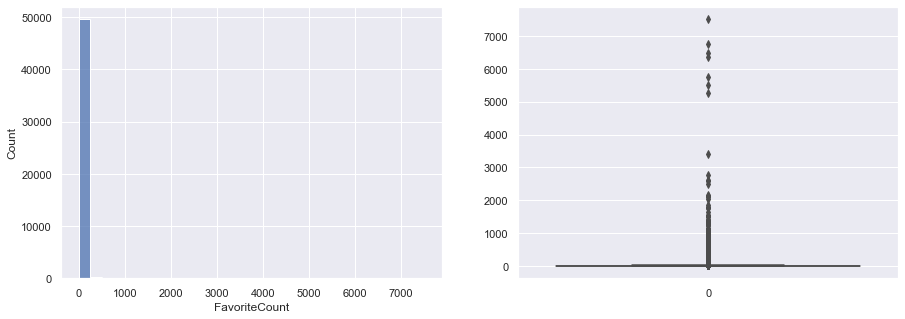

In [54]:
var = 'FavoriteCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [62]:
#Transformation logarithmique
data['FavoriteCount_log'] = [log(count+1) for count in data['FavoriteCount']]

<AxesSubplot:>

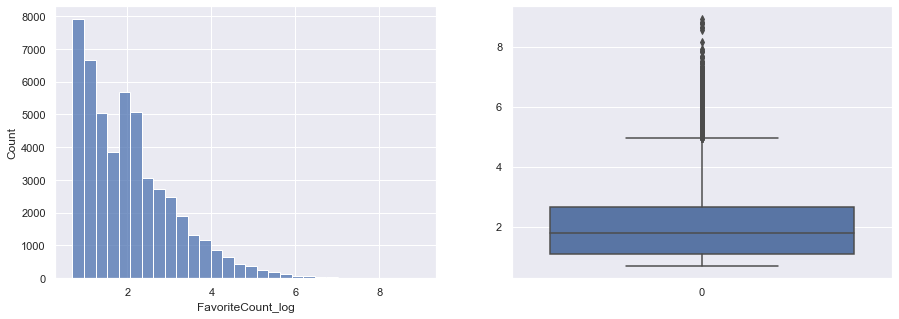

In [63]:
var = 'FavoriteCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

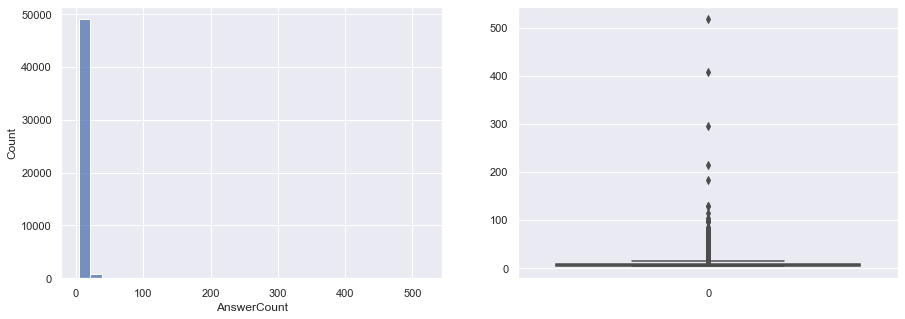

In [55]:
var = 'AnswerCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [64]:
#Transformation logarithmique
data['AnswerCount_log'] = [log(count+1) for count in data['AnswerCount']]

<AxesSubplot:>

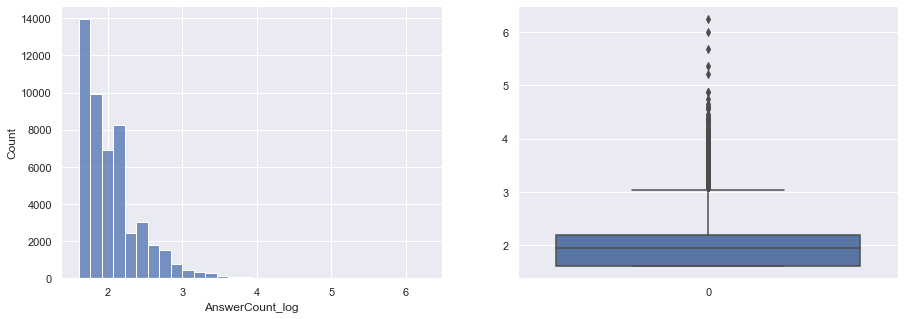

In [65]:
var = 'AnswerCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

### Analyse des nouvelles features

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              50000 non-null  object 
 1   Body               50000 non-null  object 
 2   Tags               50000 non-null  object 
 3   Id                 50000 non-null  int64  
 4   Score              50000 non-null  int64  
 5   ViewCount          50000 non-null  int64  
 6   FavoriteCount      50000 non-null  int64  
 7   AnswerCount        50000 non-null  int64  
 8   Title_len          50000 non-null  int64  
 9   Body_len           50000 non-null  int64  
 10  Tags_len           50000 non-null  int64  
 11  Tags_len_ratio     50000 non-null  float64
 12  Score_log          50000 non-null  float64
 13  ViewCount_log      50000 non-null  float64
 14  FavoriteCount_log  50000 non-null  float64
 15  AnswerCount_log    50000 non-null  float64
dtypes: float64(5), int64(8

<AxesSubplot:>

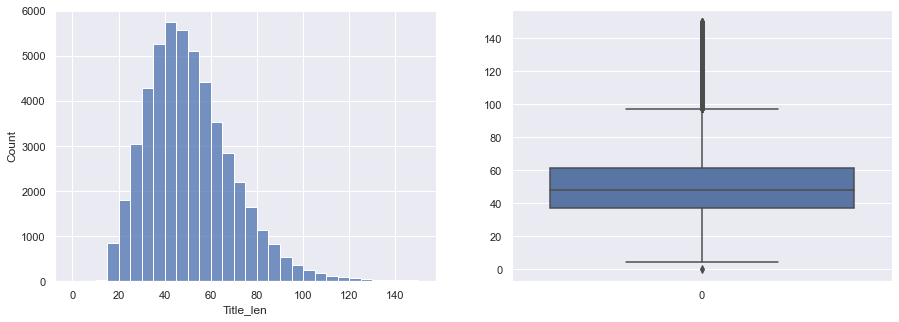

In [68]:
var = 'Title_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

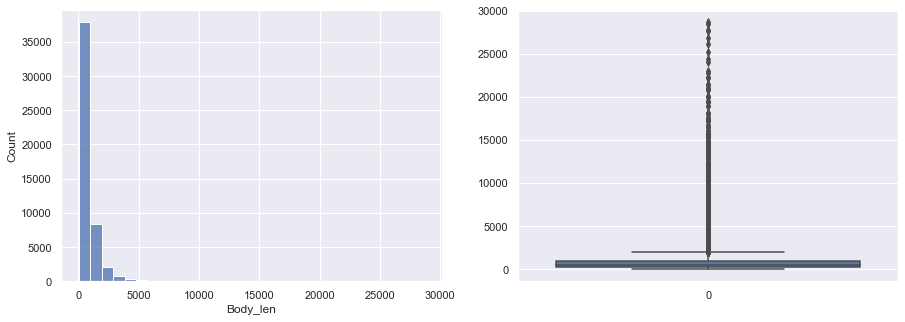

In [69]:
var = 'Body_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [74]:
#Transformation logarithmique
data['Body_len_log'] = [log(l+1) for l in data['Body_len']]

<AxesSubplot:>

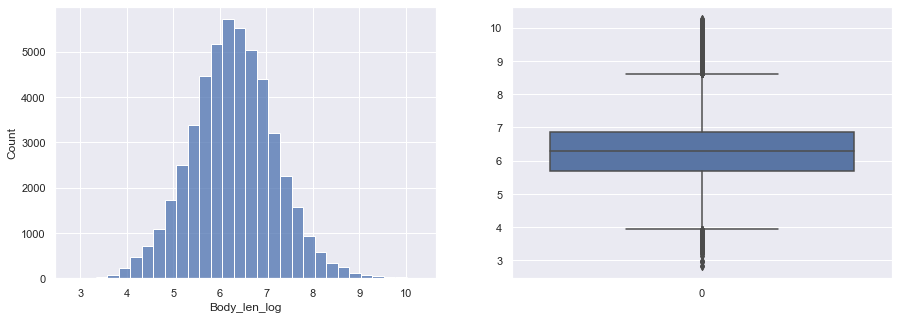

In [75]:
var = 'Body_len_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

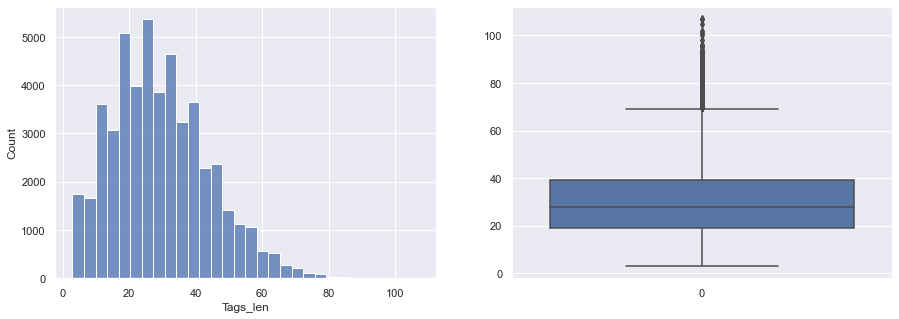

In [72]:
var = 'Tags_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

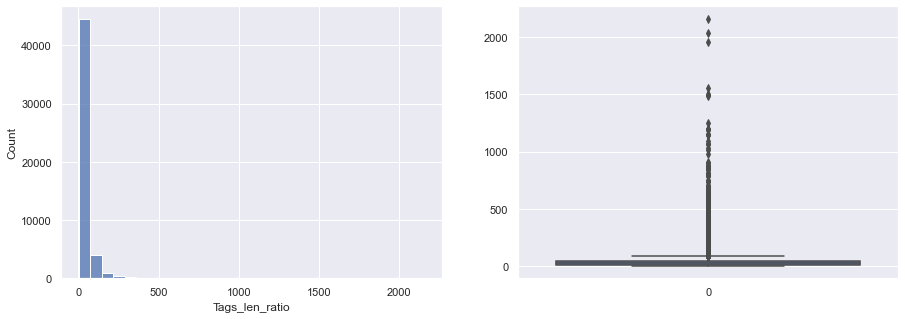

In [73]:
var = 'Tags_len_ratio'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [78]:
#Transformation logarithmique
data['Tags_len_ratio_log'] = [log(r+1) for r in data['Tags_len_ratio']]

<AxesSubplot:>

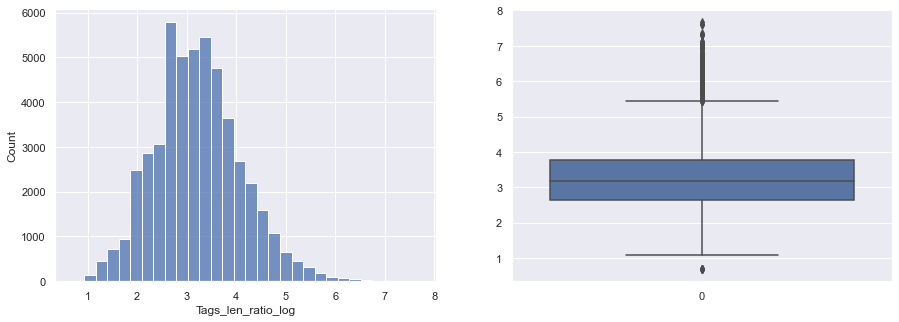

In [80]:
var = 'Tags_len_ratio_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

### Exploration des tags

In [81]:
data['Tags_split'] = data.apply(lambda r :r['Tags'].split(), axis=1)

In [82]:
data['Tags_split'].head()

0       [asp.net, sql, mysql, sql-server, scalability]
1                         [javascript, html, gwt, svg]
2    [java, hibernate, spring, exception, staleobje...
3    [java, web-frameworks, rich-internet-application]
4                                                [oop]
Name: Tags_split, dtype: object

In [83]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [112]:
dico_tags = liste_tags(data['Tags_split'])

In [113]:
dico_tags

{'asp.net': 1271,
 'sql': 1435,
 'mysql': 1039,
 'sql-server': 1038,
 'scalability': 23,
 'javascript': 3599,
 'html': 1818,
 'gwt': 61,
 'svg': 49,
 'java': 4974,
 'hibernate': 198,
 'spring': 293,
 'exception': 245,
 'staleobjectstate': 1,
 'web-frameworks': 11,
 'rich-internet-application': 5,
 'oop': 443,
 'encapsulation': 23,
 'abstraction': 10,
 'glossary': 17,
 'ooad': 8,
 'information-hiding': 4,
 'design-patterns': 299,
 'singleton': 58,
 'strategy-pattern': 7,
 'factory-method': 3,
 'linux': 781,
 'operating-system': 70,
 'kernel': 17,
 'bsd': 5,
 'osdev': 7,
 'php': 2501,
 'performance': 754,
 'high-load': 1,
 'eclipse': 423,
 'plugins': 70,
 'editor': 80,
 'svn': 393,
 'vb6': 56,
 'regex': 678,
 'xss': 23,
 'c#': 5599,
 '.net': 2640,
 'rss': 28,
 'atom-feed': 8,
 'settimeout': 10,
 'c': 1613,
 'for-loop': 69,
 'post-increment': 10,
 'pre-increment': 8,
 'gcc': 157,
 'optimization': 250,
 'memory': 191,
 'c++': 3060,
 'exists': 10,
 'sql-in': 4,
 'python': 3521,
 'windows': 

In [114]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [115]:
tags_df.head()

,Tags,Quantity
0,asp.net,1271
1,sql,1435
2,mysql,1039
3,sql-server,1038
4,scalability,23


In [116]:
tags_df['percent'] = tags_df.apply(lambda r : r['Quantity']*100/tags_df['Quantity'].sum(), axis=1)

In [117]:
tags_df.head()

,Tags,Quantity,percent
0,asp.net,1271,0.842626
1,sql,1435,0.951352
2,mysql,1039,0.688818
3,sql-server,1038,0.688156
4,scalability,23,0.015248


In [118]:
tags_df['percent'].sum()

100.0

In [119]:
tags_df.describe()

,Quantity,percent
count,11507.000000,11507.000000
mean,13.108369,0.008690
std,111.221299,0.073736
min,1.000000,0.000663
25%,1.000000,0.000663
50%,2.000000,0.001326
75%,5.000000,0.003315
max,5599.000000,3.711929


In [120]:
#Je choisis d'explorer les tags qui ont au moins 200 occurences
freqt_tags = pd.DataFrame(tags_df[tags_df['Quantity']>=200])

In [121]:
freqt_tags.shape

(90, 3)

In [122]:
list(freqt_tags['Tags'])

['asp.net',
 'sql',
 'mysql',
 'sql-server',
 'javascript',
 'html',
 'java',
 'spring',
 'exception',
 'oop',
 'design-patterns',
 'linux',
 'php',
 'performance',
 'eclipse',
 'svn',
 'regex',
 'c#',
 '.net',
 'c',
 'optimization',
 'c++',
 'python',
 'windows',
 'debugging',
 'unit-testing',
 'language-agnostic',
 'iphone',
 'android',
 'oracle',
 'string',
 'database',
 'testing',
 'ios',
 'visual-studio',
 'visual-studio-2008',
 'css',
 'algorithm',
 'winforms',
 'jquery',
 'version-control',
 'arrays',
 'vb.net',
 'parsing',
 'security',
 'sorting',
 'objective-c',
 'xml',
 'bash',
 'unix',
 'multithreading',
 'linq',
 'excel',
 'macos',
 'shell',
 'math',
 'json',
 'ajax',
 'postgresql',
 'ruby-on-rails',
 'ruby',
 'tsql',
 'asp.net-mvc',
 'file',
 'git',
 'image',
 'datetime',
 'list',
 'django',
 'r',
 'wpf',
 'perl',
 'swift',
 'node.js',
 'user-interface',
 'data-structures',
 'date',
 'http',
 'scala',
 'generics',
 'reactjs',
 'coding-style',
 'vim',
 'xcode',
 'angularjs'

[Text(0.5, 1.0, 'Répartition des effectifs pour les Tags les plus fréquents'),
 Text(0.5, 0, 'Tags les plus fréquents')]

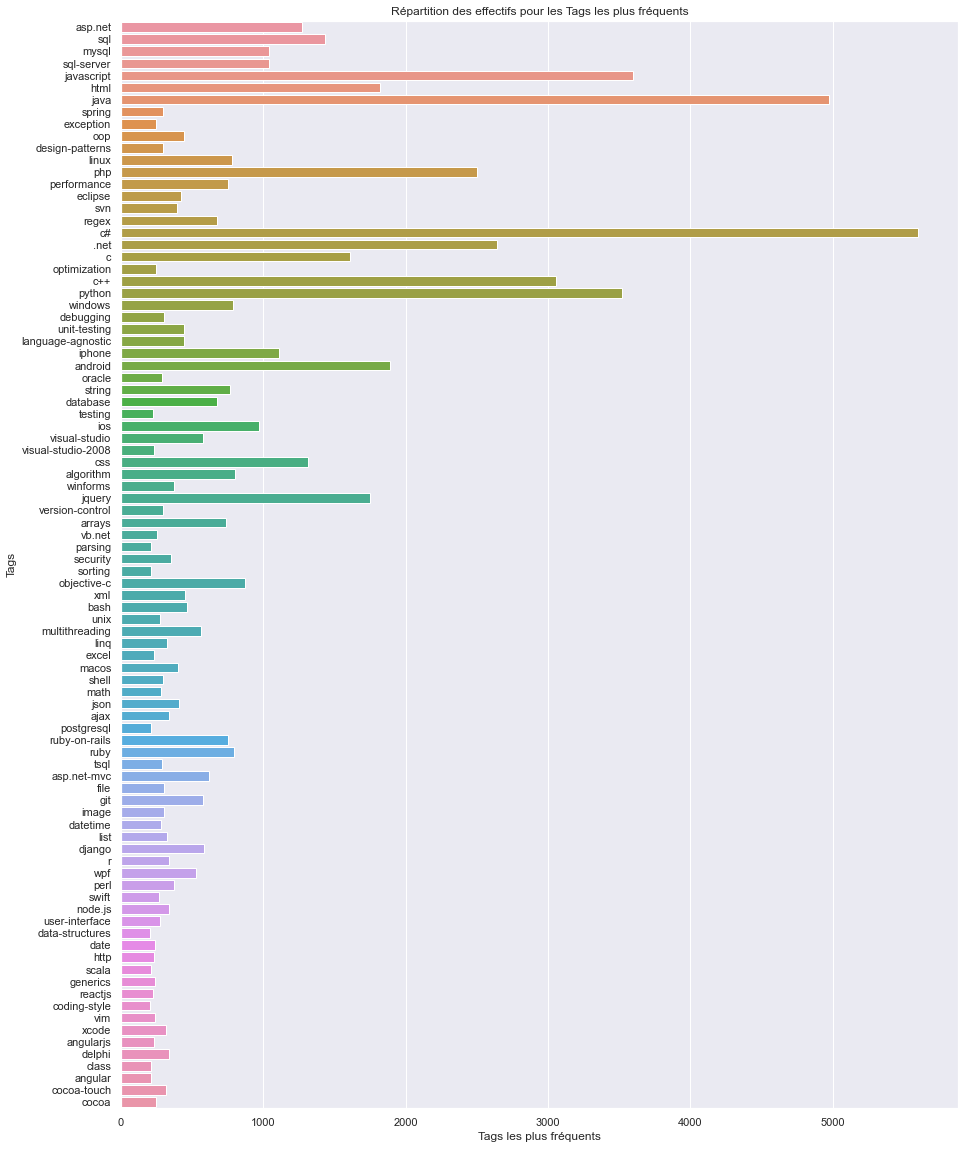

In [128]:
sns.set(rc = {'figure.figsize':(15,20)})
fig = sns.barplot(y=freqt_tags['Tags'], x=freqt_tags['Quantity'], orient='h')
fig.set(title ="Répartition des effectifs pour les Tags les plus fréquents", xlabel="Tags les plus fréquents")

In [147]:
tags_liste = list(dico_tags.keys())

In [148]:
tags_liste

['asp.net',
 'sql',
 'mysql',
 'sql-server',
 'scalability',
 'javascript',
 'html',
 'gwt',
 'svg',
 'java',
 'hibernate',
 'spring',
 'exception',
 'staleobjectstate',
 'web-frameworks',
 'rich-internet-application',
 'oop',
 'encapsulation',
 'abstraction',
 'glossary',
 'ooad',
 'information-hiding',
 'design-patterns',
 'singleton',
 'strategy-pattern',
 'factory-method',
 'linux',
 'operating-system',
 'kernel',
 'bsd',
 'osdev',
 'php',
 'performance',
 'high-load',
 'eclipse',
 'plugins',
 'editor',
 'svn',
 'vb6',
 'regex',
 'xss',
 'c#',
 '.net',
 'rss',
 'atom-feed',
 'settimeout',
 'c',
 'for-loop',
 'post-increment',
 'pre-increment',
 'gcc',
 'optimization',
 'memory',
 'c++',
 'exists',
 'sql-in',
 'python',
 'windows',
 'cmd',
 'registry',
 'debugging',
 'firefox',
 'visual-studio-2005',
 'ssas',
 'olap',
 'mdx',
 'unit-testing',
 'language-agnostic',
 'tdd',
 'iphone',
 'uitableview',
 'android',
 'android-preferences',
 'assembly',
 'x86',
 'legacy',
 '16-bit',
 'comp

In [149]:
len(tags_liste)

11507

In [133]:
stop_w = list(set(stopwords.words('english')))

In [134]:
stop_w_tags = []
for w in stop_w :
    if w in tags_liste :
        stop_w_tags.append(w)
print(stop_w_tags)
print(len(stop_w_tags))

['out', 'between', 'each', 'd', 'this', 'where', 'having', 'any']
8


In [136]:
for tag in stop_w_tags :
    print('Occurence de ', tag, ' :', dico_tags[tag])

Occurence de  out  : 3
Occurence de  between  : 1
Occurence de  each  : 8
Occurence de  d  : 10
Occurence de  this  : 29
Occurence de  where  : 3
Occurence de  having  : 2
Occurence de  any  : 1


In [152]:
tags_liste

['asp.net',
 'sql',
 'mysql',
 'sql-server',
 'scalability',
 'javascript',
 'html',
 'gwt',
 'svg',
 'java',
 'hibernate',
 'spring',
 'exception',
 'staleobjectstate',
 'web-frameworks',
 'rich-internet-application',
 'oop',
 'encapsulation',
 'abstraction',
 'glossary',
 'ooad',
 'information-hiding',
 'design-patterns',
 'singleton',
 'strategy-pattern',
 'factory-method',
 'linux',
 'operating-system',
 'kernel',
 'bsd',
 'osdev',
 'php',
 'performance',
 'high-load',
 'eclipse',
 'plugins',
 'editor',
 'svn',
 'vb6',
 'regex',
 'xss',
 'c#',
 '.net',
 'rss',
 'atom-feed',
 'settimeout',
 'c',
 'for-loop',
 'post-increment',
 'pre-increment',
 'gcc',
 'optimization',
 'memory',
 'c++',
 'exists',
 'sql-in',
 'python',
 'windows',
 'cmd',
 'registry',
 'debugging',
 'firefox',
 'visual-studio-2005',
 'ssas',
 'olap',
 'mdx',
 'unit-testing',
 'language-agnostic',
 'tdd',
 'iphone',
 'uitableview',
 'android',
 'android-preferences',
 'assembly',
 'x86',
 'legacy',
 '16-bit',
 'comp

In [154]:
print(len(tags_liste))
tags_liste = [t for t in tags_liste if t!='this']
print(len(tags_liste))

11507
11506


In [155]:
print(len(tags_liste))
tags_liste = [t for t in tags_liste if dico_tags[t] > 10]
print(len(tags_liste))

11506
1599


## Deuxième phase de Nettoyage des données

### Etapes communes

### Etapes spécifiques au Bag of Words

In [153]:
data_c2 = data_c.copy()
print(data_c2.shape)

(49997, 8)


#### Suppression des majuscules

In [154]:
def sup_maj(sentence) :
    return sentence.lower()

In [155]:
data_c2["Title"] = data_c2["Title"].apply(sup_maj)
data_c2["Title"].head()

0    react-native: download image from firebase sto...
1    how to set entity framework core migration tim...
2               gtk.statusicon and gtk.menu on windows
3    how to create shared package.json for multiple...
4    how to add draggable scrollbar to scrollview/l...
Name: Title, dtype: object

In [156]:
data_c2["Body"] = data_c2["Body"].apply(sup_maj)
data_c2["Body"].head()

0    pre-informations:\ni still have a firebase pro...
1    i'm using the latest (1.0.0) version of ef cor...
2    i have a crossplatform app that has a gtk.stat...
3    i am building my app using separated micro ser...
4    i have a listview that uses a customlistadapte...
Name: Body, dtype: object

#### Tokénisation

In [163]:
#Fonction de tokénisation qui créé des tokens en conservant les ponctuations de stags fréquents
def tokenizer_fct(sentence) :
    sentence_clean = sentence.replace('<', ' ').replace('>', ' ').replace('/', ' ').replace('_', ' ').replace(
        '""', ' ').replace('(', ' ').replace(')', ' ').replace('[', ' ').replace(']', ' ').replace('*', ' ').replace(
        '%', ' ').replace('$', ' ').replace('=', ' ').replace('€', ' ').replace('?', ' ').replace('!', ' ').replace(
        ';', ' ').replace('{', ' ').replace('}', ' ').replace('~', ' ').replace('1', ' ').replace('4', ' ').replace(
        '6', ' ').replace('9', ' ').replace(':', ' ')
    tokens = word_tokenize(sentence_clean)
    return tokens

In [164]:
data_c2["Title_t"] = data_c2["Title"].apply(tokenizer_fct)
data_c2["Title_t"].head()

0    [react-native, download, image, from, firebase...
1    [how, to, set, entity, framework, core, migrat...
2         [gtk.statusicon, and, gtk.menu, on, windows]
3    [how, to, create, shared, package.json, for, m...
4    [how, to, add, draggable, scrollbar, to, scrol...
Name: Title_t, dtype: object

In [165]:
data_c2["Body_t"] = data_c2["Body"].apply(tokenizer_fct)
data_c2["Body_t"].head()

0    [pre-informations, i, still, have, a, firebase...
1    [i, 'm, using, the, latest, .0.0, version, of,...
2    [i, have, a, crossplatform, app, that, has, a,...
3    [i, am, building, my, app, using, separated, m...
4    [i, have, a, listview, that, uses, a, customli...
Name: Body_t, dtype: object

#### Normalisation

##### Suppression des mots vides

In [234]:
stop_w

['for',
 'weren',
 'have',
 'now',
 'were',
 'is',
 'himself',
 'when',
 "she's",
 "doesn't",
 'doing',
 'so',
 "you're",
 'then',
 'too',
 'wasn',
 "weren't",
 "it's",
 'a',
 "you'd",
 'most',
 "isn't",
 'myself',
 'his',
 'into',
 'y',
 "couldn't",
 "don't",
 'mightn',
 'from',
 'other',
 'am',
 "haven't",
 'themselves',
 "shouldn't",
 'her',
 "mightn't",
 'me',
 'all',
 'by',
 'she',
 'haven',
 'further',
 "won't",
 'has',
 'your',
 'its',
 'up',
 'why',
 'here',
 'shouldn',
 'll',
 'than',
 'do',
 "didn't",
 'the',
 "should've",
 'our',
 'out',
 'will',
 'at',
 'we',
 'as',
 "that'll",
 "you'll",
 'yours',
 'those',
 'over',
 'had',
 'with',
 'didn',
 'mustn',
 'to',
 'yourself',
 'on',
 'not',
 'aren',
 'he',
 "hasn't",
 'itself',
 'should',
 's',
 'you',
 "you've",
 'o',
 'isn',
 'hasn',
 'what',
 'they',
 'can',
 'nor',
 'only',
 "aren't",
 'don',
 'needn',
 "wasn't",
 'down',
 'doesn',
 'ain',
 'while',
 "hadn't",
 'did',
 'above',
 'during',
 'won',
 'does',
 'until',
 'shan',

['was', 'having', 'each', 'this', 'm', 'd', 'where', 'against', 'any', 'between']
10


In [192]:
tags_df[tags_df['Tags'] == 'm']

,Tags,Quantity
4881,m,3


In [189]:
print(len(stop_w))
stop_w = [w for w in stop_w if stop_w_tags.count(w)==0]
print(len(stop_w))

179
169


In [193]:
def stop_word_filter(list_words) :
    filtered_w = [w for w in list_words if w not in stop_w]
    return filtered_w

In [203]:
data_c2["Title_fw"] = data_c2["Title_t"].apply(stop_word_filter)
data_c2["Title_fw"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                  [gtk.statusicon, gtk.menu, windows]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw, dtype: object

In [204]:
data_c2["Body_fw"] = data_c2["Body_t"].apply(stop_word_filter)
data_c2["Body_fw"].head()

0    [pre-informations, still, firebase, project, o...
1    ['m, using, latest, .0.0, version, ef, core, ....
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, uses, customlistadapter, created, ....
Name: Body_fw, dtype: object

##### Suppression des mots courts

In [198]:
tags_liste_2 = [w for w in tags_liste if len(w) <= 2]
print(tags_liste_2)
print(len(tags_liste_2))

['c#', 'c', 'go', 'r', 'n2', 'gd', 'f#', 'vi', 'ip', 'io', 'qt', 'na', '2d', '3d', 'z3', 'el', 'dt', 'sp', 'ld', 'k2', 's4', 'tk', 'cp', 'h2', 'ln', 'zk', 'v8', 'sf', 't4', 'q', 'p2', 'm', 'il', 'jq', 'dd', 'e4', 'nm', 'sh', 'tr', 'd', 'ca', 'gm', 'ls', 'tm', 'mq', 'rm', 'np', 'c5', 'mv', 'du', 'fs', 'xs', 'lm', 'oz', 'yo', 'cd', 'ps', 'cg', 'mt', 'ri', 'nt', 'pi', 'ml']
63


In [208]:
def short_word_filter(list_words) :
    for w in list_words :
        if len(w) <= 2 :
            if w not in tags_liste :
                list_words.remove(w)
    return list_words

In [209]:
data_c2["Title_fw2"] = data_c2["Title_fw"].apply(short_word_filter)
data_c2["Title_fw2"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                  [gtk.statusicon, gtk.menu, windows]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw2, dtype: object

In [210]:
data_c2["Body_fw2"] = data_c2["Body_fw"].apply(short_word_filter)
data_c2["Body_fw2"].head()

0    [pre-informations, still, firebase, project, o...
1    [using, latest, .0.0, version, core, migration...
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, uses, customlistadapter, created, u...
Name: Body_fw2, dtype: object

##### Lemmatization

In [213]:
lemmatizer = WordNetLemmatizer()

def lemma_fct(list_words) :
    lemma_w = []
    for w in list_words :
        lemma_w.append(lemmatizer.lemmatize(w))
    return lemma_w

In [220]:
data_c2["Title_fw3"] = data_c2["Title_fw2"].apply(lemma_fct)
data_c2["Title_fw3"].head()

0    [react-native, download, image, firebase, stor...
1    [set, entity, framework, core, migration, time...
2                   [gtk.statusicon, gtk.menu, window]
3    [create, shared, package.json, multiple, npm, ...
4    [add, draggable, scrollbar, scrollview, listvi...
Name: Title_fw3, dtype: object

In [221]:
data_c2["Body_fw3"] = data_c2["Body_fw2"].apply(lemma_fct)
data_c2["Body_fw3"].head()

0    [pre-informations, still, firebase, project, o...
1    [using, latest, .0.0, version, core, migration...
2    [crossplatform, app, gtk.statusicon, sitting, ...
3    [building, app, using, separated, micro, servi...
4    [listview, us, customlistadapter, created, use...
Name: Body_fw3, dtype: object

In [249]:
data_c2["Body_fw3"][:30]

0     [pre-informations, still, firebase, project, o...
1     [using, latest, .0.0, version, core, migration...
2     [crossplatform, app, gtk.statusicon, sitting, ...
3     [building, app, using, separated, micro, servi...
4     [listview, us, customlistadapter, created, use...
5     [serving, application, use, apache, embedded, ...
6     [getting, this, error, repeatedly, trying, con...
7     [trying, draw, rotating, 3d, coordinate, syste...
8     [updating, app, ios7, appearing, inside, statu...
9     [run, this, command, p, c, gwmi, win32, proces...
10    [stressed, header, top, page, hope, someone, h...
11    [using, gitkraken, git, managing, tool, want, ...
12    [trying, use, node.js, programmatically, build...
13    [often, hear, phrase, guard, syntactic, sugar,...
14    [would, certain, this, question, asked, could,...
15    [need, select, return, month, year, within, sp...
16    [peter, seibel, practical, common, lisp, give,...
17    [snippet, axes3d, self.fig, np.linspace, n

In [250]:
data_c2["Body_fw2"][:30]

0     [pre-informations, still, firebase, project, o...
1     [using, latest, .0.0, version, core, migration...
2     [crossplatform, app, gtk.statusicon, sitting, ...
3     [building, app, using, separated, micro, servi...
4     [listview, uses, customlistadapter, created, u...
5     [serving, application, use, apache, embedded, ...
6     [getting, this, errors, repeatedly, trying, co...
7     [trying, draw, rotating, 3d, coordinate, syste...
8     [updating, app, ios7, appearing, inside, statu...
9     [run, this, command, ps, c, gwmi, win32, proce...
10    [stressed, header, top, page, hope, someone, h...
11    [using, gitkraken, git, managing, tool, want, ...
12    [trying, use, node.js, programmatically, build...
13    [often, hear, phrase, guards, syntactic, sugar...
14    [would, certain, this, question, asked, could,...
15    [need, select, return, month, year, within, sp...
16    [peter, seibel, practical, common, lisp, gives...
17    [snippet, axes3d, self.fig, np.linspace, n

#### Extraction des bi-grams

In [237]:
def bi_gram_fct(sentense) :
    return list(nltk.bigrams(sentense))

In [238]:
data_c2["Title_bigram"] = data_c2["Title_fw3"].apply(bi_gram_fct)
data_c2["Title_bigram"].head()

0    [(react-native, download), (download, image), ...
1    [(set, entity), (entity, framework), (framewor...
2     [(gtk.statusicon, gtk.menu), (gtk.menu, window)]
3    [(create, shared), (shared, package.json), (pa...
4    [(add, draggable), (draggable, scrollbar), (sc...
Name: Title_bigram, dtype: object

In [239]:
data_c2["Body_bigram"] = data_c2["Body_fw3"].apply(bi_gram_fct)
data_c2["Body_bigram"].head()

0    [(pre-informations, still), (still, firebase),...
1    [(using, latest), (latest, .0.0), (.0.0, versi...
2    [(crossplatform, app), (app, gtk.statusicon), ...
3    [(building, app), (app, using), (using, separa...
4    [(listview, us), (us, customlistadapter), (cus...
Name: Body_bigram, dtype: object

#### Reconstitution des phrases

In [222]:
def join_fct(sentence) :
    return ' '.join(sentence)

In [223]:
data_c2["Title_j"] = data_c2["Title_fw3"].apply(join_fct)
data_c2["Title_j"].head()

0         react-native download image firebase storage
1          set entity framework core migration timeout
2                       gtk.statusicon gtk.menu window
3    create shared package.json multiple npm reposi...
4    add draggable scrollbar scrollview listview an...
Name: Title_j, dtype: object

In [224]:
data_c2["Body_j"] = data_c2["Body_fw3"].apply(join_fct)
data_c2["Body_j"].head()

0    pre-informations still firebase project opened...
1    using latest .0.0 version core migration run q...
2    crossplatform app gtk.statusicon sitting tray ...
3    building app using separated micro service eac...
4    listview us customlistadapter created user scr...
Name: Body_j, dtype: object

### tf-idf

### LDA model

#### création des dictionnaires

In [243]:
def LDA_dict_fct(corpus) :
    return corpora.Dictionary(corpus)

In [245]:
LDA_dict_title = LDA_dict_fct(list(data_c2(['Title_fw3'])))

TypeError: 'DataFrame' object is not callable